<a href="https://colab.research.google.com/github/cincinnatilibrary/collection-analysis/blob/master/misc/CHPL_Unique_Items_By_Branch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://raw.githubusercontent.com/cincinnatilibrary/collection-analysis/master/misc/CHPL_Brandmark_Primary.png" alt="CHPL" title="CHPL" width="250"/>

# CHPL Collection Analysis -- Finding unique items at branch locations across the entire system.

[CHPL Collection -- Unique Items in System By Branch Code Num -- Example Pleasant Ridge](https://collection-analysis.cincy.pl/current_collection?sql=--+find+all+unique+items%3A%0D%0A--+unique+items+are+items+that+are+the+only+item+status+%60-%60+for+the+bib+record%0D%0Awith+bibs_unique_items+as+%28%0D%0A++select%0D%0A++++bib_record_num%2C%0D%0A++++count%28item_record_num%29+as+count_item_record_num%0D%0A++from%0D%0A++++item%0D%0A++where%0D%0A++++item.item_status_code+%3D+%27-%27%0D%0A++group+by%0D%0A++++1%0D%0A++having%0D%0A++++count%28item_record_num%29+%3D+1%0D%0A%29%0D%0Aselect%0D%0A++b.bib_record_num%2C%0D%0A++--+b.count_item_record_num%2C%0D%0A++i.barcode%2C%0D%0A++i.location_code%2C%0D%0A++bib.best_title%2C%0D%0A++bib.best_author%2C%0D%0A++bib.publish_year%2C%0D%0A++i.item_callnumber%2C%0D%0A++i.volume_record_statement%2C%0D%0A++l.branch_code_num%0D%0Afrom%0D%0A++bibs_unique_items+as+b%0D%0A++join+item+as+i+on+i.bib_record_num+%3D+b.bib_record_num+AND+i.item_status_code+%3D+%27-%27%0D%0A++join+%22location%22+as+l+on+l.code+%3D+i.location_code+--+join+branch+as+b+on+b.code_num+%3D+l.branch_code_num%0D%0A++join+bib+on+bib.bib_record_num+%3D+b.bib_record_num%0D%0Awhere%0D%0A++l.branch_code_num+%3D+lower%28%3Abranch_code_num%29%0D%0Aorder+by%0D%0Alocation_code%2C%0D%0Aitem_callnumber%2C%0D%0Abest_author%2C%0D%0Abest_title&branch_code_num=33&_hide_sql=1)

Fill in the branch code num here:

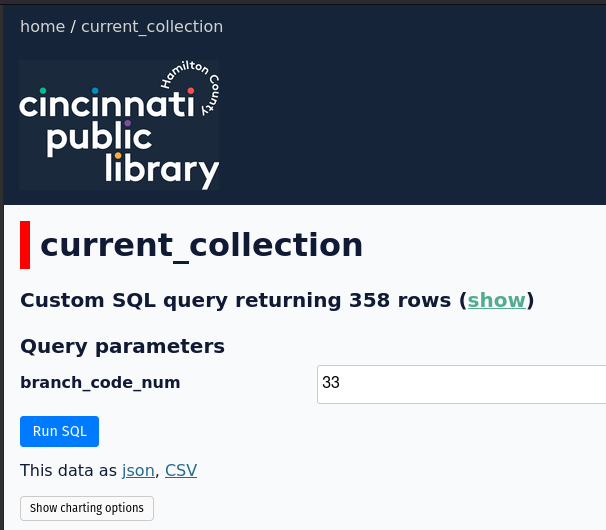


```sql
-- find all unique items:
-- unique items are items that are the only item status `-` for the bib record
with bibs_unique_items as (
  select
    bib_record_num,
    count(item_record_num) as count_item_record_num
  from
    item
  where
    item.item_status_code = '-'
  group by
    1
  having
    count(item_record_num) = 1
)
select
  b.bib_record_num,
  -- b.count_item_record_num,
  i.barcode,
  i.location_code,
  bib.best_title,
  bib.best_author,
  bib.publish_year,
  i.item_callnumber,
  i.volume_record_statement,
  l.branch_code_num
from
  bibs_unique_items as b
  join item as i on i.bib_record_num = b.bib_record_num AND i.item_status_code = '-'
  join "location" as l on l.code = i.location_code -- join branch as b on b.code_num = l.branch_code_num
  join bib on bib.bib_record_num = b.bib_record_num
where
  l.branch_code_num = lower(:branch_code_num)
order by
location_code,
item_callnumber,
best_author,
best_title
```
